## Training and Testing errors for simulated data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.1228
LDA testing Error:0.1277
QDA training Error:0.1232
QDA testing Error:0.1291
KNN5 training Error:0.1027
KNN5 testing Error:0.1439
KNN15 training Error:0.1187
KNN15 testing Error:0.1367
ANN10 training Error:0.1189
ANN10 testing Error:0.1278
ANN20 training Error:0.1180
ANN20 testing Error:0.1257


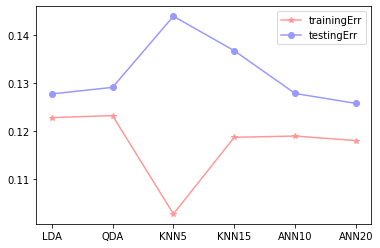

In [43]:
#hw_2_data1

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_2_data1.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#FF9999', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#9999FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

# plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_2_data1.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.0897
LDA testing Error:0.0935
QDA training Error:0.0713
QDA testing Error:0.0753
KNN5 training Error:0.0731
KNN5 testing Error:0.1005
KNN15 training Error:0.0768
KNN15 testing Error:0.0842
ANN10 training Error:0.0778
ANN10 testing Error:0.0856
ANN20 training Error:0.0773
ANN20 testing Error:0.0838


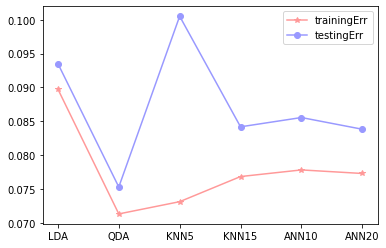

In [44]:
#hw_2_data2

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_2_data2.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#FF9999', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#9999FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

# plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_2_data2.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.0983
LDA testing Error:0.1000
QDA training Error:0.1000
QDA testing Error:0.1018
KNN5 training Error:0.0753
KNN5 testing Error:0.1112
KNN15 training Error:0.0895
KNN15 testing Error:0.0987
ANN10 training Error:0.0956
ANN10 testing Error:0.1015
ANN20 training Error:0.0962
ANN20 testing Error:0.1013


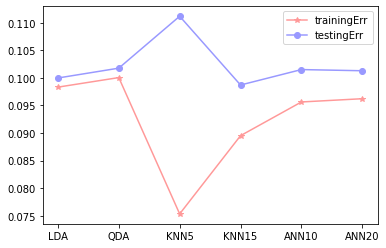

In [45]:
#hw_2_data3

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_2_data3.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#FF9999', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#9999FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

# plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_2_data3.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.1258
LDA testing Error:0.1256
QDA training Error:0.1174
QDA testing Error:0.1192
KNN5 training Error:0.1020
KNN5 testing Error:0.1300
KNN15 training Error:0.1095
KNN15 testing Error:0.1185
ANN10 training Error:0.1162
ANN10 testing Error:0.1225
ANN20 training Error:0.1172
ANN20 testing Error:0.1226


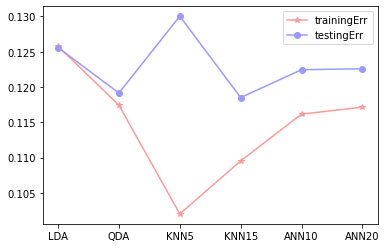

In [46]:
#hw_2_data4

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_2_data4.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#FF9999', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#9999FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

# plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_2_data4.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.2279
LDA testing Error:0.2286
QDA training Error:0.2272
QDA testing Error:0.2286
KNN5 training Error:0.1821
KNN5 testing Error:0.2793
KNN15 training Error:0.2345
KNN15 testing Error:0.2655
ANN10 training Error:0.2276
ANN10 testing Error:0.2297
ANN20 training Error:0.2302
ANN20 testing Error:0.2316


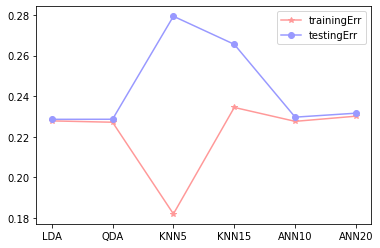

In [7]:
#hw_2_data5

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_2_data5.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#FF9999', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#9999FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_2_data5.eps', format='eps')
plt.show()


三群

C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the 

LDA training Error:0.1702
LDA testing Error:0.1748
QDA training Error:0.1716
QDA testing Error:0.1773
KNN5 training Error:0.1585
KNN5 testing Error:0.2060
KNN15 training Error:0.1670
KNN15 testing Error:0.1866
ANN10 training Error:0.1687
ANN10 testing Error:0.1820
ANN20 training Error:0.1699
ANN20 testing Error:0.1798


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


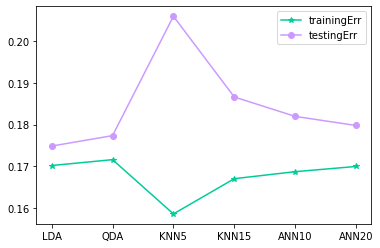

In [4]:
#data1(三群)

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_3_data1.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#00CC99', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#CC99FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

# plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_3_data1.eps', format='eps')
plt.show()


C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the 

LDA training Error:0.2436
LDA testing Error:0.2469
QDA training Error:0.2199
QDA testing Error:0.2258
KNN5 training Error:0.1832
KNN5 testing Error:0.2657
KNN15 training Error:0.2335
KNN15 testing Error:0.2552
ANN10 training Error:0.2177
ANN10 testing Error:0.2397
ANN20 training Error:0.2188
ANN20 testing Error:0.2412


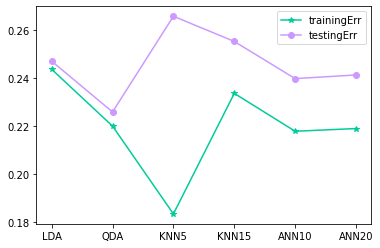

In [8]:
#data2(三群)5

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_3_data2.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#00CC99', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#CC99FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_3_data2.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.2459
LDA testing Error:0.2497
QDA training Error:0.2426
QDA testing Error:0.2488
KNN5 training Error:0.1962
KNN5 testing Error:0.2709
KNN15 training Error:0.2290
KNN15 testing Error:0.2572
ANN10 training Error:0.2486
ANN10 testing Error:0.2560
ANN20 training Error:0.2485
ANN20 testing Error:0.2540


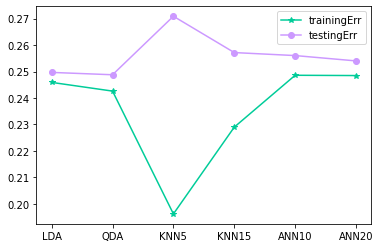

In [5]:
#data3(三群)

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_3_data3.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#00CC99', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#CC99FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_3_data3.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LDA training Error:0.2735
LDA testing Error:0.2773
QDA training Error:0.2657
QDA testing Error:0.2706
KNN5 training Error:0.2232
KNN5 testing Error:0.3116
KNN15 training Error:0.2625
KNN15 testing Error:0.2902
ANN10 training Error:0.2674
ANN10 testing Error:0.2793
ANN20 training Error:0.2671
ANN20 testing Error:0.2782


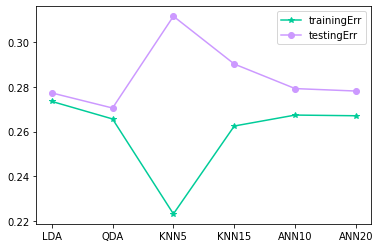

In [6]:
#data4(三群)

import numpy as np
from sklearn import neighbors
# from Lib_GenData import mvn_multiclass_data  # self-defined
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# 第一組資料
# n = [300, 200, 100] # sample size for each group
# mean = np.array([[0.5, -0.2], [2, 2], [-1, 2]])
# cov = np.array([[2.0, 0.3], [0.3, 0.5], [1.0, 0.], [0., 1.], [1.0, 0.], [0., 1.]])
# X, y = mvn_multiclass_data(mean, cov, n)

D = np.loadtxt('C:/Users/sarah/OneDrive/桌面/satatistic_hw/practice1/hw07/hw_3_data4.txt') 
X, y = D[:, 0:2], D[:, 2]

K = 1000 # bootstrapping K times
LDA_trainingErr, LDA_testingErr = np.zeros(K), np.zeros(K)
QDA_trainingErr, QDA_testingErr = np.zeros(K), np.zeros(K)
KNN5_trainingErr, KNN5_testingErr = np.zeros(K), np.zeros(K)
KNN15_trainingErr, KNN15_testingErr = np.zeros(K), np.zeros(K)
ANN10_trainingErr, ANN10_testingErr = np.zeros(K), np.zeros(K)
ANN20_trainingErr, ANN20_testingErr = np.zeros(K), np.zeros(K)
# 學習器設定
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
Knn5 = neighbors.KNeighborsClassifier(5, weights = 'uniform')
Knn15 = neighbors.KNeighborsClassifier(15, weights = 'uniform')

opts = dict(max_iter = 10000, solver = 'adam', verbose = False,\
    activation = 'logistic', tol = 1e-6)
Ann10 = MLPClassifier(hidden_layer_sizes = (10,), **opts)
Ann20 = MLPClassifier(hidden_layer_sizes = (20,), **opts)   
 
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    Qda.fit(X_train, y_train)
    Knn5.fit(X_train, y_train)
    Knn15.fit(X_train, y_train)
    Ann10.fit(X_train, y_train)
    Ann20.fit(X_train, y_train)

    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    ANN10_trainingErr[i] = 1 - Ann10.score(X_train, y_train)
    ANN10_testingErr[i] = 1 - Ann10.score(X_test, y_test)
    ANN20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    ANN20_testingErr[i] = 1 - Ann20.score(X_test, y_test)

print("LDA training Error:{:.4f}".format(LDA_trainingErr.mean()))
print("LDA testing Error:{:.4f}".format(LDA_testingErr.mean()))
print("QDA training Error:{:.4f}".format(QDA_trainingErr.mean()))
print("QDA testing Error:{:.4f}".format(QDA_testingErr.mean()))
print("KNN5 training Error:{:.4f}".format(KNN5_trainingErr.mean()))
print("KNN5 testing Error:{:.4f}".format(KNN5_testingErr.mean()))
print("KNN15 training Error:{:.4f}".format(KNN15_trainingErr.mean()))
print("KNN15 testing Error:{:.4f}".format(KNN15_testingErr.mean()))
print("ANN10 training Error:{:.4f}".format(ANN10_trainingErr.mean()))
print("ANN10 testing Error:{:.4f}".format(ANN10_testingErr.mean()))
print("ANN20 training Error:{:.4f}".format(ANN20_trainingErr.mean()))
print("ANN20 testing Error:{:.4f}".format(ANN20_testingErr.mean()))

a = [2, 4, 6, 8 , 10, 12]
b =['LDA', 'QDA','KNN5', 'KNN15', 'ANN10', 'ANN20'] 
trainingErr = [LDA_trainingErr.mean(), QDA_trainingErr.mean(), KNN5_trainingErr.mean(), KNN15_trainingErr.mean(), ANN10_trainingErr.mean(), ANN20_trainingErr.mean()]
testingErr = [LDA_testingErr.mean(), QDA_testingErr.mean(), KNN5_testingErr.mean(), KNN15_testingErr.mean(), ANN10_testingErr.mean(), ANN20_testingErr.mean()]
plt.plot(a, trainingErr,'*-', color = '#00CC99', label = 'trainingErr')
plt.plot(a, testingErr,'o-', color = '#CC99FF', label = 'testingErr')
plt.legend()
plt.xticks(a, b)
plt.yticks()

plt.savefig('C:\\Users\\sarah\\OneDrive\\桌面\\satatistic_hw\\XeLaTex\\eps_seven\\hw_3_data4.eps', format='eps')
plt.show()
